In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from IPython.display import display

In [20]:
df = pd.read_csv('spotify_history.csv')

In [25]:

display(df.head(20))

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
6,1I4EczxGBcPR3J3KeyqFJP,2013-07-08 03:17:56,web player,0,We Own The Sky,M83,Saturdays = Youth,nextbtn,nextbtn,False,False
7,5arVt2Wg0zbiWwAOZef2Nl,2013-07-08 03:17:56,web player,1268,Higher Ground - Remastered 2003,Red Hot Chili Peppers,Mother's Milk,nextbtn,nextbtn,False,False
8,1ixtaZc0Adil3yD1ItPqSl,2013-07-08 03:17:58,web player,0,Happy Up Here,Röyksopp,Happy Up Here,nextbtn,nextbtn,False,False
9,2v5mpowLQNFN7NC46l0bJS,2013-07-08 03:19:11,web player,0,Phantom,Justice,Phantom,nextbtn,clickrow,False,False


In [23]:

# Check for missing values
display(df.isnull().sum())


,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,143
reason_end,117
shuffle,0


In [31]:
df = df.dropna()

In [26]:
# Basic statistics
display(df.describe())

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [33]:
# Konversi ke format datetime dengan memastikan perubahan dilakukan pada DataFrame asli
df = df.copy()  # Tambahkan ini untuk menghindari warning
df.loc[:, 'ts'] = pd.to_datetime(df['ts'])  
df.loc[:, 'hour'] = df['ts'].dt.hour  




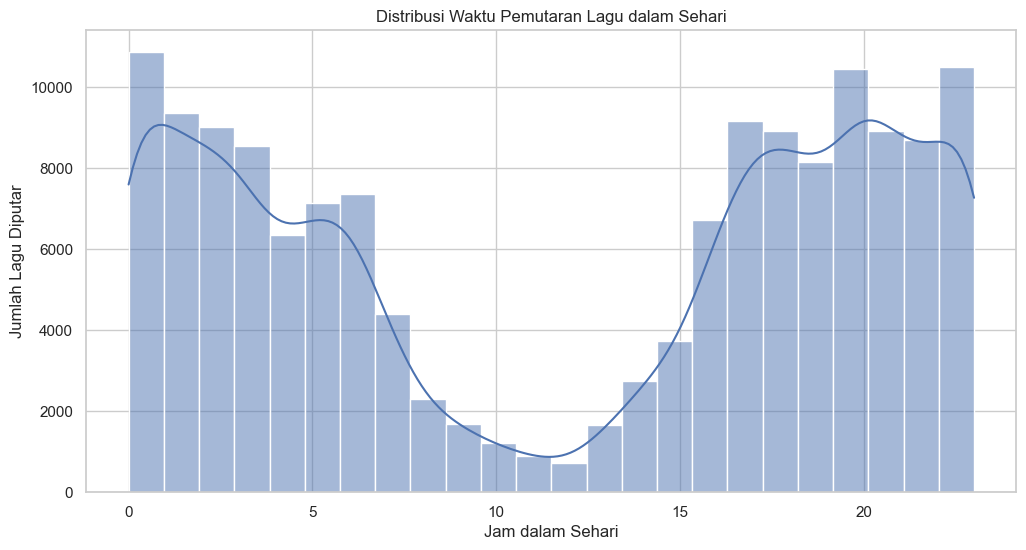

In [34]:
# Konversi ke format datetime dengan memastikan perubahan dilakukan pada DataFrame asli
df = df.copy()  # Tambahkan ini untuk menghindari warning
df.loc[:, 'ts'] = pd.to_datetime(df['ts'])  
df.loc[:, 'hour'] = df['ts'].dt.hour  



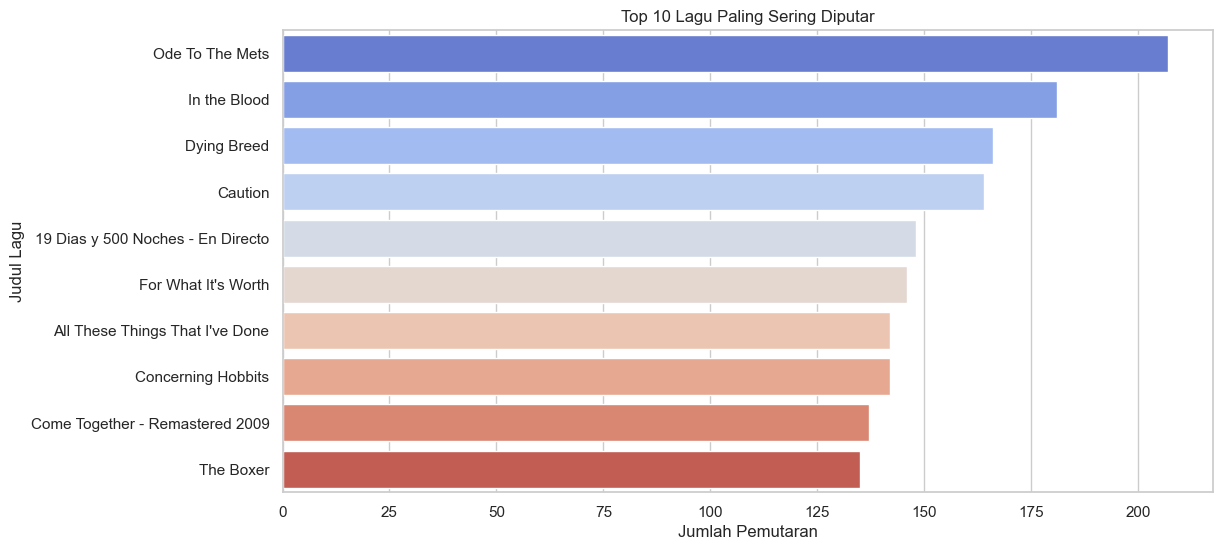

In [41]:
# Lagu paling sering diputar
top_tracks = df['track_name'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='coolwarm', hue=top_tracks.index, legend=False)
plt.xlabel('Jumlah Pemutaran')
plt.ylabel('Judul Lagu')
plt.title('Top 10 Lagu Paling Sering Diputar')
plt.show()

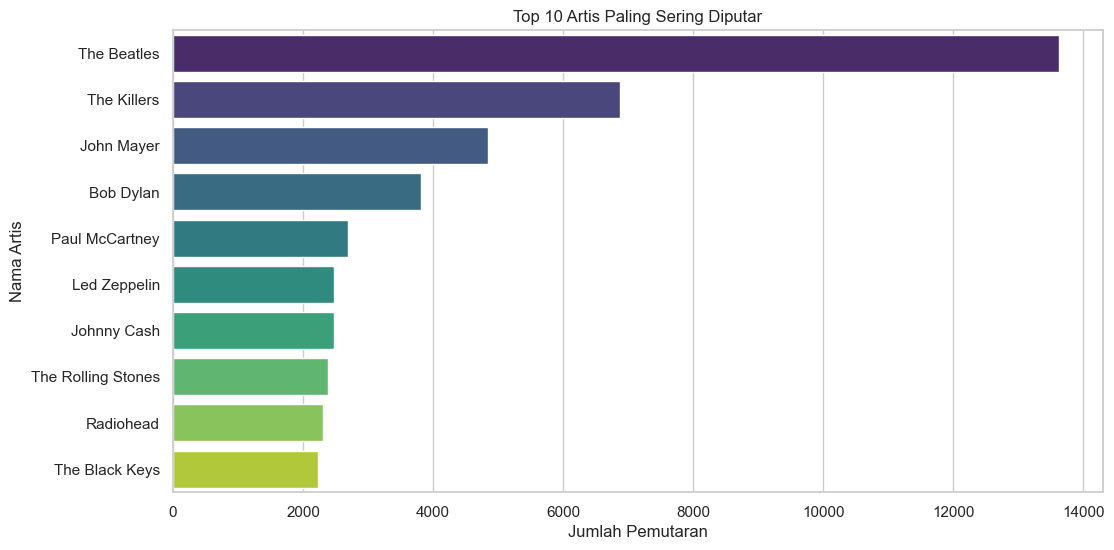

In [40]:
# Artis paling sering diputar
top_artists = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis', hue=top_artists.index, legend=False)
plt.xlabel('Jumlah Pemutaran')
plt.ylabel('Nama Artis')
plt.title('Top 10 Artis Paling Sering Diputar')
plt.show()

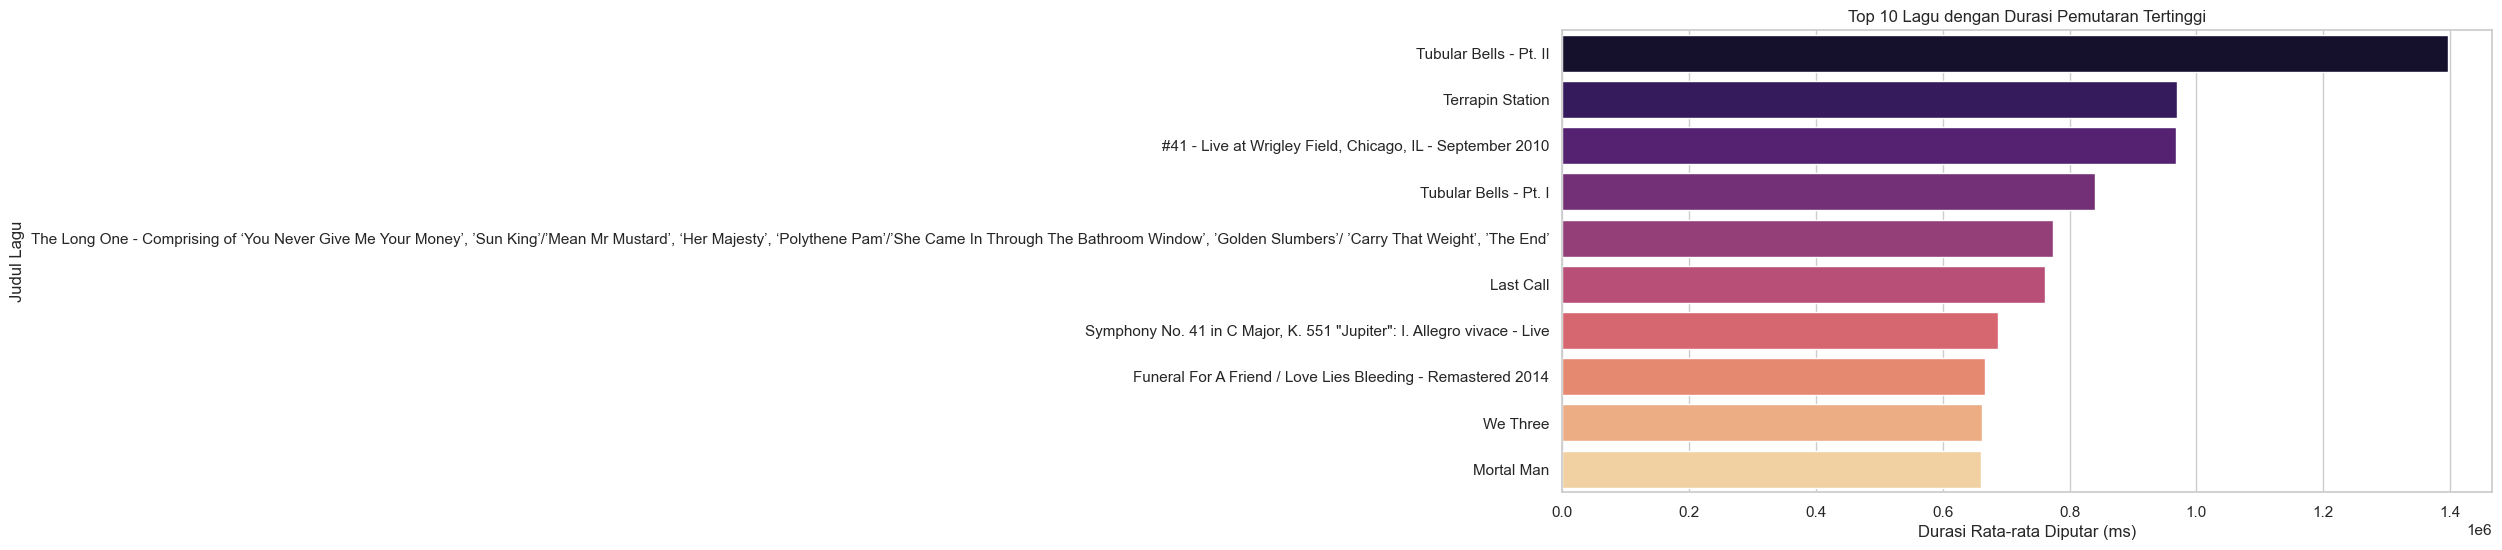

In [39]:
# Rata-rata durasi pemutaran per lagu
avg_play_time = df.groupby('track_name')['ms_played'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_play_time.values, y=avg_play_time.index, palette='magma', hue=avg_play_time.index, legend=False)

plt.xlabel('Durasi Rata-rata Diputar (ms)')
plt.ylabel('Judul Lagu')
plt.title('Top 10 Lagu dengan Durasi Pemutaran Tertinggi')
plt.show()


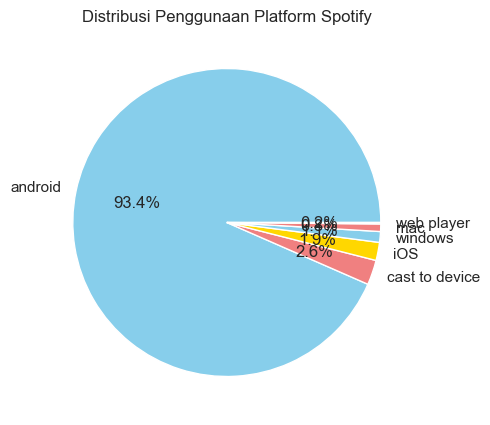

In [44]:
# Persentase penggunaan platform
platform_counts = df['platform'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'gold'])
plt.title('Distribusi Penggunaan Platform Spotify')
plt.show()


In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [53]:
# Hapus data dengan nilai kosong
df = df.dropna()



In [57]:
df = pd.read_csv('spotify_history.csv')
print(df.head())



        spotify_track_uri                   ts    platform  ms_played  \
0  2J3n32GeLmMjwuAzyhcSNe  2013-07-08 02:44:34  web player       3185   
1  1oHxIPqJyvAYHy0PVrDU98  2013-07-08 02:45:37  web player      61865   
2  487OPlneJNni3NWC8SYqhW  2013-07-08 02:50:24  web player     285386   
3  5IyblF777jLZj1vGHG2UD3  2013-07-08 02:52:40  web player     134022   
4  0GgAAB0ZMllFhbNc3mAodO  2013-07-08 03:17:52  web player          0   

                                      track_name        artist_name  \
0                            Say It, Just Say It       The Mowgli's   
1  Drinking from the Bottle (feat. Tinie Tempah)      Calvin Harris   
2                                    Born To Die       Lana Del Rey   
3                               Off To The Races       Lana Del Rey   
4                                      Half Mast  Empire Of The Sun   

                           album_name reason_start reason_end  shuffle  \
0                Waiting For The Dawn     autoplay   clickro

In [58]:
display(df.head())  # Lihat isi awal dataset

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [60]:
# Konversi 'ts' ke datetime & tambahkan fitur jam
df['ts'] = pd.to_datetime(df['ts'])
df['hour'] = df['ts'].dt.hour  


In [61]:
# Pilih fitur dan target
X = df[['hour', 'ms_played']]  # Fitur
y = df['platform']  # Target (misalnya: web player, mobile, dll.)

In [62]:
# Encode target ke numerik
le = LabelEncoder()
y = le.fit_transform(y)

In [63]:
# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
 #Training model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [66]:
# Prediksi
y_pred = model.predict(X_test)

In [67]:
# Evaluasi
print(classification_report(y_test, y_pred, target_names=le.classes_))

                precision    recall  f1-score   support

       android       0.93      1.00      0.97     28005
cast to device       0.00      0.00      0.00       755
           iOS       0.00      0.00      0.00       587
           mac       0.00      0.00      0.00       243
    web player       0.00      0.00      0.00        42
       windows       0.00      0.00      0.00       340

      accuracy                           0.93     29972
     macro avg       0.16      0.17      0.16     29972
  weighted avg       0.87      0.93      0.90     29972



C:\Users\USER LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [70]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_train.head())


(119888, 2)
(119888,)
        hour  ms_played
96174      5         23
64125     15     178265
70980     17     162769
11749     20     165000
113958    18     382266


In [72]:
from sklearn.preprocessing import LabelEncoder

# Konversi label target (y_train) jika perlu
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Cek apakah ada kolom kategori di X_train
print(X_train.dtypes)


hour         int32
ms_played    int64
dtype: object


In [73]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [74]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.4f}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred))


Akurasi Model: 0.9340
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     28005
           1       0.00      0.00      0.00       755
           2       0.11      0.00      0.00       587
           3       0.00      0.00      0.00       243
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00       340

    accuracy                           0.93     29972
   macro avg       0.17      0.17      0.16     29972
weighted avg       0.88      0.93      0.90     29972



C:\Users\USER LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa